In [1]:
import sys
from pathlib import Path

root_path = Path().cwd().parent
if str(root_path) not in sys.path:
    sys.path.append(str(root_path))
from utils.utils import loading_data
df_parquet = loading_data()

📦 Loading data from Parquet: ensemble_2022-07-01_2025-10-01.parquet


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# First view:

In [165]:
print("COLUMNS:\n")
display(df_parquet.columns)

print(f"\nNumber of rows: {len(df_parquet)}")
print(f"Number of platforms: {len(df_parquet['Platform'].unique())}")
print(f"Number of platforms after applying to_lower(): {len(df_parquet['Platform'].apply(lambda x: x.lower()).unique())}")

print("\nDATAFRAME:")
display(df_parquet.head(5))

COLUMNS:



Index(['Reporting month', 'Sales Month', 'Platform', 'Country / Region',
       'Label Name', 'Artist Name', 'Release title', 'Track title', 'UPC',
       'ISRC', 'Release Catalog nb', 'Streaming Subscription Type',
       'Release type', 'Sales Type', 'Quantity', 'Client Payment Currency',
       'Unit Price', 'Mechanical Fee', 'Gross Revenue', 'Client share rate',
       'Net Revenue'],
      dtype='object')


Number of rows: 3721580
Number of platforms: 97
Number of platforms after applying to_lower(): 95

DATAFRAME:


,Reporting month,Sales Month,Platform,Country / Region,Label Name,Artist Name,Release title,Track title,UPC,ISRC,...,Streaming Subscription Type,Release type,Sales Type,Quantity,Client Payment Currency,Unit Price,Mechanical Fee,Gross Revenue,Client share rate,Net Revenue
0,2022/09/01,2022/09/01,YouTube Music Premium,Thailand,No Mercy,Gustav:s,Vertigo,Vertigo,3617050712547,CA-5KR-21-17023,...,Premium,Music Release,Stream,3,EUR,0.001135,0.0,0.003405,0.765,0.002605
1,2022/09/01,2022/09/01,YouTube Music Premium,Spain,No Mercy,Gustav:s,Vertigo,Vertigo,3617050712547,CA-5KR-21-17023,...,Premium,Music Release,Stream,5,EUR,0.001215,0.0,0.006075,0.765,0.004647
2,2022/09/01,2022/09/01,YouTube Music Premium,Mexico,No Mercy,Gustav:s,Vertigo,Vertigo,3617050712547,CA-5KR-21-17023,...,Premium,Music Release,Stream,2,EUR,0.000077,0.0,0.000154,0.765,0.000118
3,2022/09/01,2022/09/01,YouTube Music Premium,Norway,No Mercy,Gustav:s,Vertigo,Vertigo,3617050712547,CA-5KR-21-17023,...,Premium,Music Release,Stream,2,EUR,0.000571,0.0,0.001142,0.765,0.000874
4,2022/09/01,2022/09/01,YouTube Music Premium,Ireland,No Mercy,Gustav:s,Vertigo,Vertigo,3617050712547,CA-5KR-21-17023,...,Premium,Music Release,Stream,1,EUR,0.000307,0.0,0.000307,0.765,0.000235


## Platforms sorted by billing

In [7]:
df_billing_platform = (
    df_parquet
    .groupby('Platform', as_index=False)['Net Revenue']
    .sum()
    .rename(columns={'Net Revenue': 'Billing'})
    .sort_values(by='Billing', ascending=False)
)

df_billing_platform['Billing'] = df_billing_platform['Billing'].round(2)

In [8]:
df_billing_platform.head(10)

,Platform,Billing
59,Spotify,152162.18
84,YouTube Official Content,33661.88
18,Beatport,30659.18
16,Apple Music,21130.12
87,YouTube UGC,19640.36
19,Beatport Link,7237.28
26,Deezer,4800.83
95,iTunes,2151.70
69,Tidal,1356.79
29,Facebook / Instagram,1220.71


## Platforms sorted by avg. client share rate

In [9]:
df_share_rate = (
    df_parquet
    .groupby('Platform', as_index=False)['Client share rate']
    .mean()
    .rename(columns={'Client share rate': 'Avg. Client share rate'})
    .sort_values(by='Avg. Client share rate', ascending=False)
)

In [10]:
df_share_rate.head(10)

,Platform,Avg. Client share rate
49,PELOTON,0.785000
93,iMusica Brazil,0.785000
81,Yango,0.785000
59,Spotify,0.784217
9,Amazon Music Download,0.774787
56,SberZvuk,0.774662
10,Amazon Music Streaming,0.774598
79,YG Plus,0.773696
58,Soundtrack Your Brand,0.772565
47,NetEase,0.772011


# Only Spotify filter

In [11]:
df_spotify = df_parquet[df_parquet['Platform'] == 'Spotify']

In [12]:
df_spotify.columns

Index(['Reporting month', 'Sales Month', 'Platform', 'Country / Region',
       'Label Name', 'Artist Name', 'Release title', 'Track title', 'UPC',
       'ISRC', 'Release Catalog nb', 'Streaming Subscription Type',
       'Release type', 'Sales Type', 'Quantity', 'Client Payment Currency',
       'Unit Price', 'Mechanical Fee', 'Gross Revenue', 'Client share rate',
       'Net Revenue'],
      dtype='object')

In [13]:
df_spotify.head(5)

,Reporting month,Sales Month,Platform,Country / Region,Label Name,Artist Name,Release title,Track title,UPC,ISRC,...,Streaming Subscription Type,Release type,Sales Type,Quantity,Client Payment Currency,Unit Price,Mechanical Fee,Gross Revenue,Client share rate,Net Revenue
7461,2022/12/01,2022/11/01,Spotify,Netherlands,No Mercy,FORBIDDEN,Substance Abuse,Psychological Warfare,3617050780904,CA-5KR-00-06509,...,Premium,Music Release,Stream,9,EUR,0.005387,0.0,0.048480,0.765,0.037087
7462,2022/12/01,2022/11/01,Spotify,United kingdom,No Mercy,FORBIDDEN,Substance Abuse,Psychological Warfare,3617050780904,CA-5KR-00-06509,...,Premium,Music Release,Stream,7,EUR,0.003560,0.0,0.024919,0.765,0.019063
7463,2022/12/01,2022/11/01,Spotify,Germany,No Mercy,FORBIDDEN,Substance Abuse,Psychological Warfare,3617050780904,CA-5KR-00-06509,...,Premium,Music Release,Stream,14,EUR,0.002318,0.0,0.032452,0.765,0.024826
7464,2022/12/01,2022/11/01,Spotify,Switzerland,No Mercy,FORBIDDEN,Substance Abuse,Psychological Warfare,3617050780904,CA-5KR-00-06509,...,Premium,Music Release,Stream,1,EUR,0.006213,0.0,0.006213,0.765,0.004753
7471,2022/12/01,2022/11/01,Spotify,Germany,No Mercy,FORBIDDEN,Substance Abuse,Psychological Warfare,3617050780904,CA-5KR-00-06509,...,Premium,Music Release,Stream,2,EUR,0.003348,0.0,0.006695,0.765,0.005122


In [14]:
cols_to_preserve = list(df_spotify.columns.copy())

for col in df_spotify.columns:
    if len(df_spotify[col].unique()) <= 1:
        print(f"{col}: {df_spotify[col].unique()}")
        cols_to_preserve.remove(col)
print()
display(cols_to_preserve)

Platform: ['Spotify']
Release type: ['Music Release']
Client Payment Currency: ['EUR']
Mechanical Fee: [0.]



['Reporting month',
 'Sales Month',
 'Country / Region',
 'Label Name',
 'Artist Name',
 'Release title',
 'Track title',
 'UPC',
 'ISRC',
 'Release Catalog nb',
 'Streaming Subscription Type',
 'Sales Type',
 'Quantity',
 'Unit Price',
 'Gross Revenue',
 'Client share rate',
 'Net Revenue']

In [15]:
cols_to_preserve.remove('Sales Month')
cols_to_preserve.remove('Track title')
cols_to_preserve.remove('UPC')

In [16]:
display(cols_to_preserve)

['Reporting month',
 'Country / Region',
 'Label Name',
 'Artist Name',
 'Release title',
 'ISRC',
 'Release Catalog nb',
 'Streaming Subscription Type',
 'Sales Type',
 'Quantity',
 'Unit Price',
 'Gross Revenue',
 'Client share rate',
 'Net Revenue']

In [17]:
cols_to_drop = list(set(df_spotify.columns) - set(cols_to_preserve))
display(cols_to_drop)

['Sales Month',
 'Track title',
 'Release type',
 'UPC',
 'Client Payment Currency',
 'Mechanical Fee',
 'Platform']

In [18]:
df_spotify = (
    df_spotify
    .drop(columns=cols_to_drop)
    .reset_index(drop=True)
)

In [19]:
list(df_spotify.columns) == cols_to_preserve

True

In [193]:
print(df_spotify.columns)

Index(['Reporting month', 'Country / Region', 'Label Name', 'Artist Name',
       'Release title', 'ISRC', 'Release Catalog nb',
       'Streaming Subscription Type', 'Sales Type', 'Quantity', 'Unit Price',
       'Gross Revenue', 'Client share rate', 'Net Revenue'],
      dtype='object')


In [20]:
df_billing_artist = (
    df_spotify
    .groupby('Artist Name', as_index=False)
    .agg(
        Billing=('Net Revenue', 'sum'),
        historic_len=('Net Revenue', 'size')
    )
)

df_billing_artist['Billing'] = df_billing_artist['Billing'].round(2)

df_billing_artist['billing_ratio'] = (
    df_billing_artist['Billing'] / df_billing_artist['historic_len']
)

df_billing_artist = df_billing_artist.sort_values(
    by='billing_ratio',
    ascending=False
)

display(df_billing_artist.head(10))

,Artist Name,Billing,historic_len,billing_ratio
68,"FOVOS, Loosie Grind",5954.46,4104,1.450892
9,"Acidus, MXGN",39575.82,30084,1.315511
164,Sons Of Charlie,2556.96,3446,0.742008
27,"BYØRN, Per Pleks",5139.48,11706,0.439047
86,"IGDA, A.N.I.",1267.52,3088,0.410466
70,Fantasm,7545.29,23889,0.315848
169,"Stan Christ, Doruksen",8388.30,29713,0.282311
13,"Alt1, MDDLTN",457.37,2210,0.206955
186,VIDØ,10850.44,54927,0.197543
198,blckr thn blck,3146.00,16499,0.190678


In [21]:
df_billing_artist.sort_values(
    by='Billing',
    ascending=False
).head(10)

,Artist Name,Billing,historic_len,billing_ratio
9,"Acidus, MXGN",39575.82,30084,1.315511
186,VIDØ,10850.44,54927,0.197543
25,BYØRN,8621.43,65440,0.131746
169,"Stan Christ, Doruksen",8388.30,29713,0.282311
70,Fantasm,7545.29,23889,0.315848
68,"FOVOS, Loosie Grind",5954.46,4104,1.450892
157,Rian Wood,5399.56,54944,0.098274
27,"BYØRN, Per Pleks",5139.48,11706,0.439047
107,"Luca Agnelli, PISAPIA (IT)",3745.42,30326,0.123505
138,PISAPIA (IT),3459.67,45487,0.076058


In [22]:
unique_artists = df_billing_artist['Artist Name'].unique()
print(f"Unique artists: {len(unique_artists)}")
display(unique_artists)

Unique artists: 203


array(['FOVOS, Loosie Grind', 'Acidus, MXGN', 'Sons Of Charlie',
       'BYØRN, Per Pleks', 'IGDA, A.N.I.', 'Fantasm',
       'Stan Christ, Doruksen', 'Alt1, MDDLTN', 'VIDØ', 'blckr thn blck',
       'Sons Of Charlie, Ben Nicky', 'MXGN, PSP, PYREZ', 'BYØRN',
       'Paolo Ferrara, Lorenzo Raganzini, Arytmia',
       'Luca Agnelli, PISAPIA (IT)', 'Binary Squad', 'CIRCO', '6ejou',
       'Vizionn', 'RBX', 'blk.', 'SCARLETT', 'POPOF, Dorian Parano',
       'Rian Wood', 'Iraja, Black Box, Luc Rushmere',
       'Noneoftheabove, Coppa', 'AEREA', 'Herbrido',
       'Stan Christ, Zeltak, Acidus', 'BYØRN, PYREZ, PSP', 'PISAPIA (IT)',
       'H! Dude', 'Knurft', 'Jkll, Binary Squad', 'PSP',
       'The Technocrats', 'Tony Junior, Acidus, MXGN', 'VIDO',
       'Black Traffic', 'Gustav:s', 'Fenrick', 'Version 34', 'Rawdolff',
       '753', 'PSP, blckr thn blck',
       'BYØRN, Violent Methods, Gabriel Padrevita', 'Khira Li',
       'PYREZ, Anticure', 'Mr.Machine', 'Iraja, Black Box, SKYWALKER',
  

In [24]:
artists = list(set(
    [
        artist
        for x in df_billing_artist['Artist Name'].unique()
        for artist in x.split(", ")
    ]
))

print(len(artists))

print(artists)

218
['Dok & Martin', 'Knurft', 'RUTHLESS', 'Wumi Spell', 'Loosie Grind', 'BEYOND Ü', 'Jkll', 'Lack 0f Fate', 'Coppa', 'Balagan', 'BEXA', 'Scove', 'Gustav:s', 'Parsa Jafari', 'Barbara Lago', 'Air Of Wave', 'Snef', 'MTT', 'ESM3', 'VIDO', 'SKYWALKER', 'Ingrid (IT)', 'BCKYRD', 'HXTC', 'Acidus', 'Joel Balada', 'Malke', 'GNRØ', 'Nico Bondi', 'Tunnelblick 46', 'Doruksen', 'Niereich', 'CSTS', 'Denis Dekay', 'Blicz', 'G.K Lennon', 'Lost Minds (DE)', 'EXIX', 'MXGN', 'Chemtrailz', 'Pyramidal Decode', 'LuizFribs', 'Monsieur Warradi', 'CIRCO', 'DRKPHNTM', 'bastet', 'Azenti', 'Sons Of Charlie', 'TRNQUL', 'C2Ø', 'Not a headliner', 'RE_P', 'Ominousboy', 'The Enveloper', 'IOA', 'blk.', 'Essan', 'Black Box', 'MËRO', 'PISAPIA (IT)', 'Binary Squad', 'Greg Notill', 'Per Pleks', 'AEREA', 'SCARLETT', 'Stan Christ', 'Jotis', 'JAUKS', 'Remon Verhoeve', 'Reform', 'IBIS TEMPLUM', 'Noneoftheabove', 'GALLØ', 'Perc', 'Mai Narave', 'Valley (ESP)', 'Darian Jaburg', 'Alex Farell', 'YROR?', 'DØPAIR', 'Viper XXL', 'Noth

In [25]:
print(list(set(artists) - set(set(artists) & set(unique_artists))))
print()
print(list(set(unique_artists) - set(set(artists) & set(unique_artists))))

['Under The Moon', 'ZORG', 'Posk', 'Alt1', 'Wumi Spell', 'Loosie Grind', 'EFTEE', 'Per Pleks', 'Anticure', 'Koross', 'Jkll', 'JORG', 'Stan Christ', 'Coppa', 'Balagan', 'BEXA', 'Dorian Parano', 'LFB', 'Scove', 'NICE KEED', 'Parsa Jafari', 'IBIS TEMPLUM', 'Noneoftheabove', 'Perc', 'FOVOS', 'Tony Junior', 'Snef', 'YROR?', 'CHRLYFST', 'HANI', 'ESM3', 'SKYWALKER', 'Ingrid (IT)', 'Rebekah', 'HXTC', 'Joel Balada', 'Acidus', 'Fabrizio De Santis', 'Gabriel Padrevita', 'RUBIØ', 'Doruksen', 'Lorenzo Raganzini', 'Lost Minds (DE)', 'Keen Roy', 'Luc Rushmere', 'MXGN', 'A.N.I.', 'FenoR', 'Hackler & Kuch', 'Luis Buehler', 'Iraja', 'Chemtrailz', 'Violent Methods', 'IGDA', 'Ben Nicky', 'Mickey Nox', 'POPOF', 'Peligre', 'B2', 'MDDLTN', 'Kryon', 'Not a headliner', 'ReCorpo', 'Svetec', 'etto.', 'Malgani', 'Luca Agnelli', 'Vince Weyn', 'Paolo Ferrara', 'Black Box']

['Chemtrailz, HANI', 'Alt1, MDDLTN', 'Acidus, MXGN', 'Jkll, Binary Squad', 'Gianma Bln, PISAPIA (IT)', 'Joel Balada, CHRLYFST', 'Lost Minds (DE

In [26]:
df_spotify.columns

Index(['Reporting month', 'Country / Region', 'Label Name', 'Artist Name',
       'Release title', 'ISRC', 'Release Catalog nb',
       'Streaming Subscription Type', 'Sales Type', 'Quantity', 'Unit Price',
       'Gross Revenue', 'Client share rate', 'Net Revenue'],
      dtype='object')

1) Split "Artist Name" with .split(", ")
2) delete "" from Artist_Name_List
3) If len(Artist_Name_List) == 1 -> mantain row as it was.
     else:
       duplicate rows to match len(Artist_Name_List).
       foreach duplicated row:
           row['Quantity'] = int(row['Quantity']/len(Artist_Name_List))
           row['Gross Revenue'] = row['Quantity'] * row['Unit Price']
           row['Net Revenue'] = row['Gross Revenue'] * row['Client share rate']
    

In [27]:
df = df_spotify.copy()

# 1) Split artist names and remove empty strings
df["Artist_Name_List"] = (
    df["Artist Name"]
    .str.split(", ")
    .apply(lambda lst: [a for a in lst if a])
)

# 2) Store number of artists per row
df["n_artists"] = df["Artist_Name_List"].str.len()

# 3) Explode so each artist gets its own row
df = df.explode("Artist_Name_List", ignore_index=True)

# 4) Update Artist Name
df["Artist Name"] = df["Artist_Name_List"]

# 5) Recompute values only when multiple artists were present
multi_artist_mask = df["n_artists"] > 1

df.loc[multi_artist_mask, "Quantity"] = (
    df.loc[multi_artist_mask, "Quantity"] // df.loc[multi_artist_mask, "n_artists"]
)

df.loc[multi_artist_mask, "Gross Revenue"] = (
    df.loc[multi_artist_mask, "Quantity"] *
    df.loc[multi_artist_mask, "Unit Price"]
)

df.loc[multi_artist_mask, "Net Revenue"] = (
    df.loc[multi_artist_mask, "Gross Revenue"] *
    df.loc[multi_artist_mask, "Client share rate"]
)

# 6) Clean up helper columns
df = df.drop(columns=["Artist_Name_List", "n_artists"])

In [28]:
df.head()

,Reporting month,Country / Region,Label Name,Artist Name,Release title,ISRC,Release Catalog nb,Streaming Subscription Type,Sales Type,Quantity,Unit Price,Gross Revenue,Client share rate,Net Revenue
0,2022/12/01,Netherlands,No Mercy,FORBIDDEN,Substance Abuse,CA-5KR-00-06509,NM026,Premium,Stream,9,0.005387,0.048480,0.765,0.037087
1,2022/12/01,United kingdom,No Mercy,FORBIDDEN,Substance Abuse,CA-5KR-00-06509,NM026,Premium,Stream,7,0.003560,0.024919,0.765,0.019063
2,2022/12/01,Germany,No Mercy,FORBIDDEN,Substance Abuse,CA-5KR-00-06509,NM026,Premium,Stream,14,0.002318,0.032452,0.765,0.024826
3,2022/12/01,Switzerland,No Mercy,FORBIDDEN,Substance Abuse,CA-5KR-00-06509,NM026,Premium,Stream,1,0.006213,0.006213,0.765,0.004753
4,2022/12/01,Germany,No Mercy,FORBIDDEN,Substance Abuse,CA-5KR-00-06509,NM026,Premium,Stream,2,0.003348,0.006695,0.765,0.005122


In [29]:
unique_artists_2 = df['Artist Name'].unique()

In [30]:
print(list(set(artists) - set(set(artists) & set(unique_artists_2))))
print(list(set(unique_artists_2) - set(set(artists) & set(unique_artists_2))))
print(len(df_spotify))
print(len(df))

[]
[]
1591523
1960021


In [31]:
df_billing_artist_2 = (
    df
    .groupby('Artist Name', as_index=False)
    .agg(
        Billing=('Net Revenue', 'sum'),
        historic_len=('Net Revenue', 'size')
    )
)

df_billing_artist_2['Billing'] = df_billing_artist_2['Billing'].round(2)

df_billing_artist_2['billing_ratio'] = (
    df_billing_artist_2['Billing'] / df_billing_artist_2['historic_len']
)

df_billing_artist_2 = df_billing_artist_2.sort_values(
    by='billing_ratio',
    ascending=False
)

display(df_billing_artist_2.head(10))

,Artist Name,Billing,historic_len,billing_ratio
71,FOVOS,2975.42,4104,0.725005
115,Loosie Grind,2975.42,4104,0.725005
181,Sons Of Charlie,2599.91,4234,0.614055
125,MXGN,19908.87,34779,0.572439
8,Acidus,19996.23,38799,0.515380
73,Fantasm,7545.29,23889,0.315848
158,Per Pleks,2565.78,11706,0.219185
3,A.N.I.,632.53,3088,0.204835
92,IGDA,632.53,3088,0.204835
198,VIDØ,10850.44,54927,0.197543


In [71]:
print("\n================ BEST BILLING ================")
display(
    df_billing_artist_2.sort_values(
        by='Billing',
        ascending=False
    ).head(5)
)

print("\n================ MORE HISTORIC ================")
display(
    df_billing_artist_2.sort_values(
        by='historic_len',
        ascending=False
    ).head(5)
)

print("\n============== BEST BILLING RATIO ==============")
display(
    df_billing_artist_2.sort_values(
        by='billing_ratio',
        ascending=False
    ).head(5)
)


================ BEST BILLING ================


,Artist Name,Billing,historic_len,billing_ratio
8,Acidus,19996.23,38799,0.515380
125,MXGN,19908.87,34779,0.572439
26,BYØRN,11564.94,94473,0.122415
198,VIDØ,10850.44,54927,0.197543
73,Fantasm,7545.29,23889,0.315848



================ MORE HISTORIC ================


,Artist Name,Billing,historic_len,billing_ratio
26,BYØRN,11564.94,94473,0.122415
150,PISAPIA (IT),5384.77,78506,0.068591
183,Stan Christ,4861.30,68407,0.071064
5,ACOR,2338.61,64047,0.036514
138,Mr.Machine,3050.31,59179,0.051544



============== BEST BILLING RATIO ==============


,Artist Name,Billing,historic_len,billing_ratio
71,FOVOS,2975.42,4104,0.725005
115,Loosie Grind,2975.42,4104,0.725005
181,Sons Of Charlie,2599.91,4234,0.614055
125,MXGN,19908.87,34779,0.572439
8,Acidus,19996.23,38799,0.515380


In [33]:
artists_to_analyze = ["FOVOS", "BYØRN", "Acidus"]

df_filtered = df[df["Artist Name"].isin(artists_to_analyze)].copy().reset_index(drop=True)

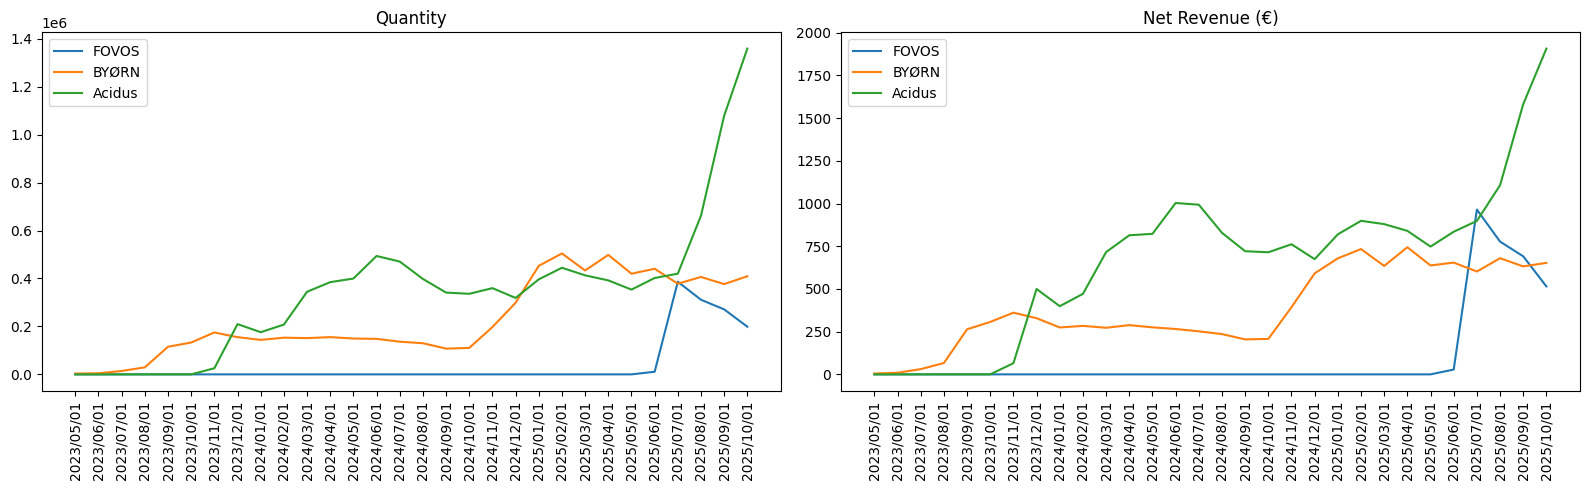

In [79]:
df_filtered = df_filtered.sort_values(by="Reporting month")

all_months = (
    df_filtered["Reporting month"]
    .drop_duplicates()
    .sort_values()
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharex=True)

# --------- Graphic 1: Quantity ---------
for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(Quantity=("Quantity", "sum"))
        .set_index("Reporting month")
        .reindex(all_months, fill_value=0)
    )

    ax1.plot(
        all_months,
        df_aux["Quantity"].values,
        label=artist_name
    )

ax1.set_title("Quantity")
ax1.tick_params(axis="x", rotation=90)
ax1.legend()

# --------- Graphic 2: Net Revenue ---------
for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(Net_Revenue=("Net Revenue", "sum"))
        .set_index("Reporting month")
        .reindex(all_months, fill_value=0)
    )

    ax2.plot(
        all_months,
        df_aux["Net_Revenue"].values,
        label=artist_name
    )

ax2.set_title("Net Revenue (€)")
ax2.tick_params(axis="x", rotation=90)
ax2.legend()

plt.tight_layout()
plt.show()


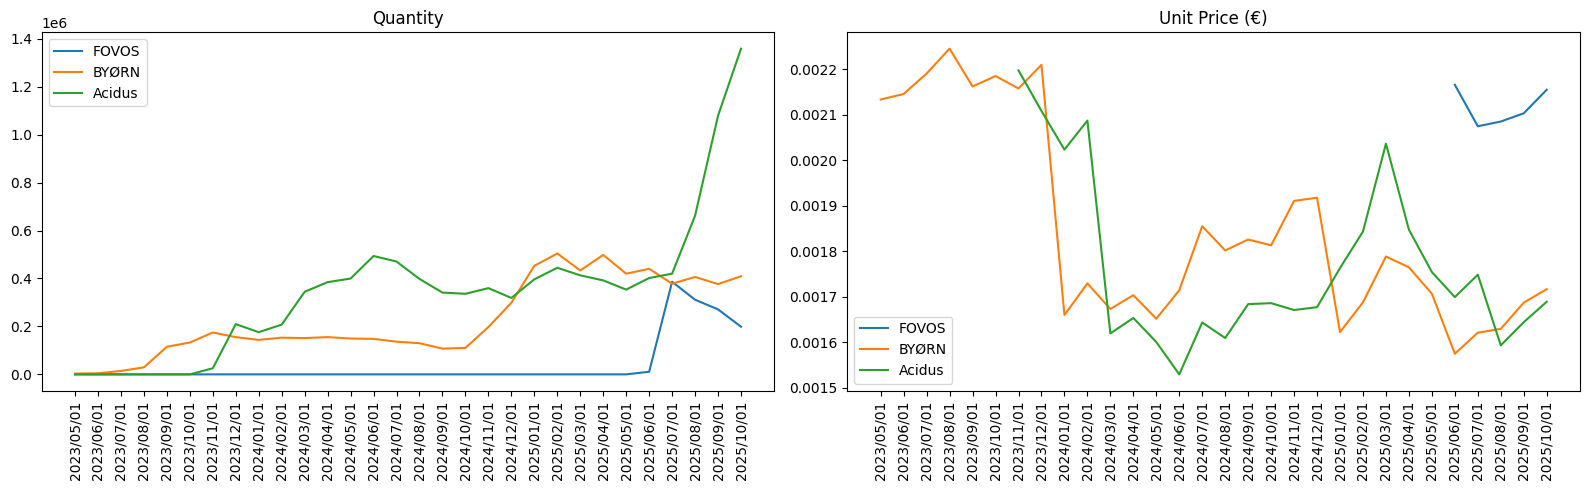

In [228]:
df_filtered = df_filtered.sort_values(by="Reporting month")

all_months = (
    df_filtered["Reporting month"]
    .drop_duplicates()
    .sort_values()
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharex=True)

# --------- Graphic 1: Quantity ---------
for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(Quantity=("Quantity", "sum"))
        .set_index("Reporting month")
        .reindex(all_months, fill_value=0)
    )

    ax1.plot(
        all_months,
        df_aux["Quantity"].values,
        label=artist_name
    )

ax1.set_title("Quantity")
ax1.tick_params(axis="x", rotation=90)
ax1.legend()

# --------- Graphic 2: Net Revenue ---------
for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(Unit_Price=("Unit Price", "mean"))
        .set_index("Reporting month")
        .reindex(all_months, fill_value=np.nan)
    )

    ax2.plot(
        all_months,
        df_aux["Unit_Price"].values,
        label=artist_name
    )

ax2.set_title("Unit Price (€)")
ax2.tick_params(axis="x", rotation=90)
ax2.legend()

plt.tight_layout()
plt.show()


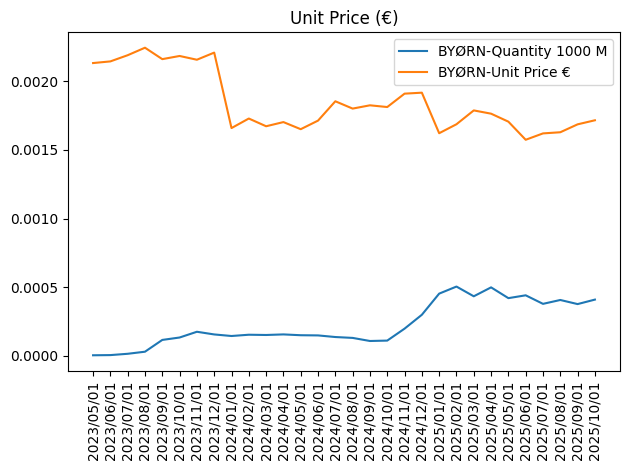

In [226]:
df_filtered = df_filtered.sort_values(by="Reporting month")

all_months = (
    df_filtered["Reporting month"]
    .drop_duplicates()
    .sort_values()
)

# --------- Graphic 2: Net Revenue ---------
for artist_name in [artists_to_analyze[1]]:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(
            Quantity=("Quantity", "sum"),
            Unit_Price=("Unit Price", "mean")
        )
        .set_index("Reporting month")
        .reindex(all_months, fill_value=np.nan)
    )

    plt.plot(
        all_months,
        df_aux["Quantity"].values / 1000000000,
        label=f"{artist_name}-Quantity 1000 M"
    )
    
    plt.plot(
        all_months,
        df_aux["Unit_Price"].values,
        label=f"{artist_name}-Unit Price €"
    )

plt.title("Unit Price (€)")
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


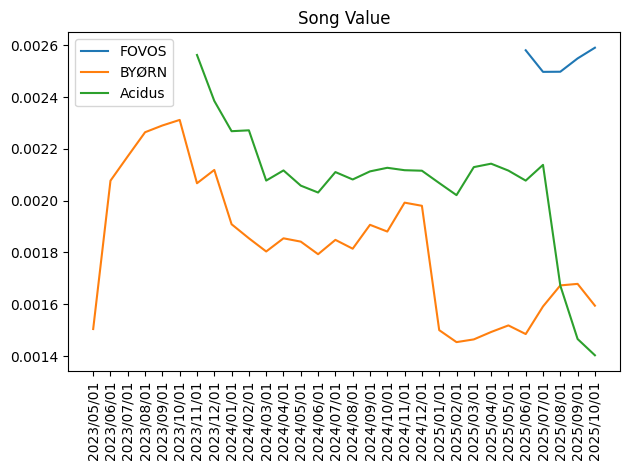

In [81]:
df_filtered = df_filtered.sort_values(by="Reporting month")

all_months = (
    df_filtered["Reporting month"]
    .drop_duplicates()
    .sort_values()
)


for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(
            Quantity=("Quantity", "sum"),
            Net_Revenue=("Net Revenue", "sum")
        )
        .set_index("Reporting month")
        .reindex(all_months, fill_value=0)
    )

    df_aux['song_value'] = df_aux['Net_Revenue'] / df_aux['Quantity']
    
    plt.plot(
        all_months,
        df_aux["song_value"].values,
        label=artist_name
    )

plt.title("Song Value")
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [86]:
df_filtered.columns

Index(['Reporting month', 'Country / Region', 'Label Name', 'Artist Name',
       'Release title', 'ISRC', 'Release Catalog nb',
       'Streaming Subscription Type', 'Sales Type', 'Quantity', 'Unit Price',
       'Gross Revenue', 'Client share rate', 'Net Revenue'],
      dtype='object')

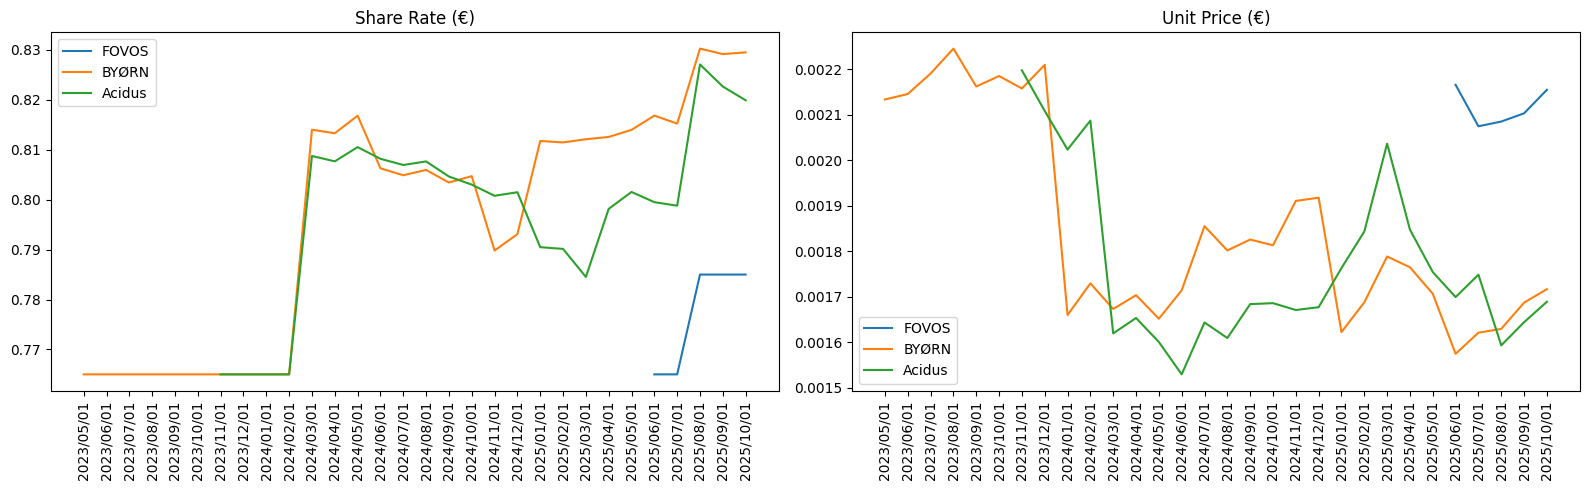

In [230]:
df_filtered = df_filtered.sort_values(by="Reporting month")

all_months = (
    df_filtered["Reporting month"]
    .drop_duplicates()
    .sort_values()
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharex=True)

# --------- Graphic 1: Quantity ---------
for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(
            Share=("Client share rate", "mean"),
            Net_Revenue=("Net Revenue", "sum")
        )
        .set_index("Reporting month")
        .reindex(all_months, fill_value=np.nan)
    )

    ax1.plot(
        all_months,
        df_aux["Share"].values,
        label=artist_name
    )

ax1.set_title("Share Rate (€)")
ax1.tick_params(axis="x", rotation=90)
ax1.legend()

# --------- Graphic 2: Net Revenue ---------
for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(
            Unit_Price=("Unit Price", "mean")
        )
        .set_index("Reporting month")
        .reindex(all_months, fill_value=np.nan)
    )

    ax2.plot(
        all_months,
        df_aux["Unit_Price"].values,
        label=artist_name
    )

ax2.set_title("Unit Price (€)")
ax2.tick_params(axis="x", rotation=90)
ax2.legend()

plt.tight_layout()
plt.show()


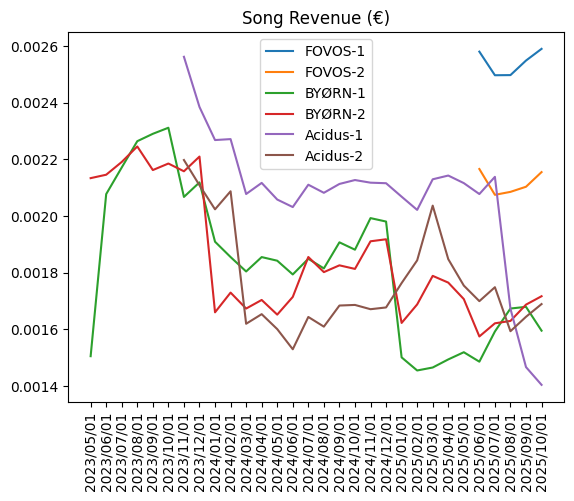

In [93]:
df_filtered = df_filtered.sort_values(by="Reporting month")

all_months = (
    df_filtered["Reporting month"]
    .drop_duplicates()
    .sort_values()
)

# --------- Graphic 1: Quantity ---------
for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(
            Quantity=("Quantity", "sum"),
            Net_Revenue=("Net Revenue", "sum"),
            Unit_Price=("Unit Price", "mean")
        )
        .set_index("Reporting month")
        .reindex(all_months, fill_value=np.nan)
    )

    df_aux['song_revenue'] = (df_aux['Net_Revenue'] / df_aux['Quantity'])

    plt.plot(
        all_months,
        df_aux["song_revenue"].values,
        label=f"{artist_name}-1"
    )

    plt.plot(
        all_months,
        df_aux["Unit_Price"].values,
        label=f"{artist_name}-2"
    )

plt.title("Song Revenue (€)")
plt.xticks(rotation=90)
plt.legend()
plt.show()

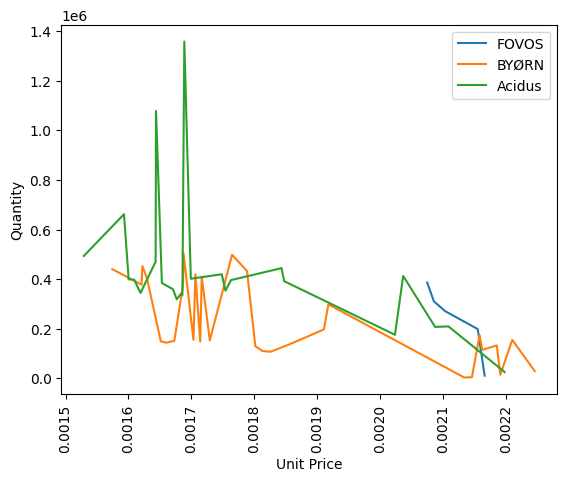

In [207]:
df_filtered = df_filtered.sort_values(by="Unit Price")

all_prices = (
    df_filtered["Unit Price"]
    .drop_duplicates()
    .sort_values()
)

# --------- Graphic 1: Quantity ---------
for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(
            Unit_Price=("Unit Price", "mean"),
            Quantity = ("Quantity", "sum")
        )
        .sort_values(by="Unit_Price", ascending = True)
    )

    plt.plot(
        df_aux["Unit_Price"].values,
        df_aux["Quantity"].values,
        label=f"{artist_name}"
    )

    # min_aux = df_aux['Unit_Price'].min()
    # max_aux = df_aux['Unit_Price'].max()
    # len_aux = len(df_aux)
    # step_aux = (max_aux - min_aux) / len_aux
    # x_y_aux = np.arange(min_aux, max_aux + step_aux, step_aux)

    # plt.plot(x_y_aux, x_y_aux, color = "black")
    
plt.title("")
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.legend()
plt.show()

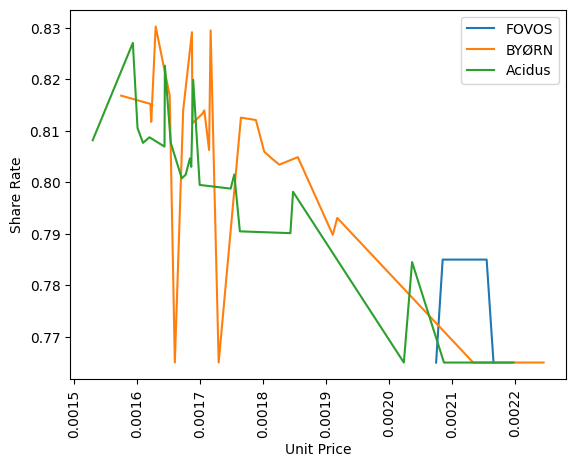

In [204]:
df_filtered = df_filtered.sort_values(by="Unit Price")

all_prices = (
    df_filtered["Unit Price"]
    .drop_duplicates()
    .sort_values()
)

# --------- Graphic 1: Quantity ---------
for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(
            Unit_Price=("Unit Price", "mean"),
            Share = ("Client share rate", "mean")
        )
        .sort_values(by="Unit_Price", ascending = True)
    )

    plt.plot(
        df_aux["Unit_Price"].values,
        df_aux["Share"].values,
        label=f"{artist_name}"
    )

    # min_aux = df_aux['Unit_Price'].min()
    # max_aux = df_aux['Unit_Price'].max()
    # len_aux = len(df_aux)
    # step_aux = (max_aux - min_aux) / len_aux
    # x_y_aux = np.arange(min_aux, max_aux + step_aux, step_aux)

    # plt.plot(x_y_aux, x_y_aux, color = "black")
    
plt.title("")
plt.xlabel("Unit Price")
plt.ylabel("Share Rate")
plt.xticks(rotation=90)
plt.legend()
plt.show()

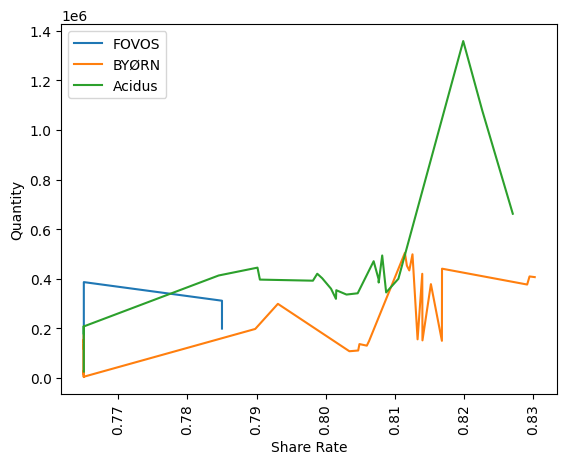

In [232]:
df_filtered = df_filtered.sort_values(by="Client share rate")

all_prices = (
    df_filtered["Client share rate"]
    .drop_duplicates()
    .sort_values()
)

# --------- Graphic 1: Quantity ---------
for artist_name in artists_to_analyze:
    df_aux = (
        df_filtered[df_filtered["Artist Name"] == artist_name]
        .groupby("Reporting month", as_index=False)
        .agg(
            Quantity=("Quantity", "sum"),
            Share = ("Client share rate", "mean")
        )
        .sort_values(by="Share", ascending = True)
    )

    plt.plot(
        df_aux["Share"].values,
        df_aux["Quantity"].values,
        label=f"{artist_name}"
    )

    # min_aux = df_aux['Unit_Price'].min()
    # max_aux = df_aux['Unit_Price'].max()
    # len_aux = len(df_aux)
    # step_aux = (max_aux - min_aux) / len_aux
    # x_y_aux = np.arange(min_aux, max_aux + step_aux, step_aux)

    # plt.plot(x_y_aux, x_y_aux, color = "black")
    
plt.title("")
plt.xlabel("Share Rate")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Chatgpt

In [314]:
acidus = df_filtered[df_filtered["Artist Name"] == 'Acidus']
acidus = acidus[acidus['Reporting month'] == '2025/06/01']
acidus = acidus[acidus['Streaming Subscription Type'] == 'Premium']

acidus = acidus[acidus['Unit Price'] >= 0.0]

# Analisis por canción
acidus = acidus[acidus['ISRC'] == 'DG-A0M-23-83965']

print(len(acidus.drop(columns = ['Unit Price', "Quantity", "Gross Revenue", "Client share rate", "Net Revenue"])))

# alguno nos la lía: Hay 133 países distintos donde se escucha la canción
print(len(acidus.drop(columns = ['Unit Price', "Quantity", "Gross Revenue", "Client share rate", "Net Revenue"]).drop_duplicates()))

# Si dejamos fuera el "Client share rate" seguimos dropeando duplicados -> el client share rate no afecta al ISRC
print(len(acidus.drop(columns = ['Unit Price', "Quantity", "Gross Revenue", "Net Revenue"]).drop_duplicates()))

# Si dejamos fuera el "Unit Price" NO dropeamos duplicados -> el "Unit Price" varía en función del ISRC
print(len(acidus.drop(columns = ["Quantity", "Gross Revenue", "Client share rate", "Net Revenue"]).drop_duplicates()))

# # Si dejamos fuera el "Unit Price" NO dropeamos duplicados -> el "Unit Price" varía en función del ISRC
# print(len(acidus.drop(columns = ['Unit Price', "Quantity", "Gross Revenue", "Net Revenue"]).drop_duplicates()))

788
133
133
788


Base line: repros x2

Iteración 1) 
Experimento:
    Entrenar: [Reporting month, ISRC], Quantity, Net_revenue
    Input usuario: Quantity 

Experimento:
    Entrenar: [Reporting month, ISRC], Quantity, (Shared, Unit)
    Input usuario: Quantity 

Iteración 3)
[Reporting month, ISRC], Quantity, Quantity_1_month_ago, Quantity_2_month_ago, Net_revenue
Input usuario: Quantity 

Iteración 4) 
[Reporting month, ISRC, Paises], Paises, Quantity, (Shared, Unit)
Input usuario: (Paises), Quantity

[Iteración 5)] [Reporting month, ISRC, Paises], [Historic Reporting month], ISRC, Paises, Quantity, (Shared, Unit)
Input usuario: ISRC -> Si no existía -> imputarlo como 'nuevo', (Paises), Quantity

Inputs:('Reporting month'), 'Country / Region', 'Label Name', 'Artist Name',
       'Release title', 'ISRC', 'Release Catalog nb',
       'Streaming Subscription Type', 'Sales Type', 'Quantity',
       'Gross Revenue',
       
Output: 'Client share rate', 'Unit Price', ('Net Revenue')

In [237]:
df.columns

Index(['Reporting month', 'Country / Region', 'Label Name', 'Artist Name',
       'Release title', 'ISRC', 'Release Catalog nb',
       'Streaming Subscription Type', 'Sales Type', 'Quantity', 'Unit Price',
       'Gross Revenue', 'Client share rate', 'Net Revenue'],
      dtype='object')

In [236]:
df.head()

,Reporting month,Country / Region,Label Name,Artist Name,Release title,ISRC,Release Catalog nb,Streaming Subscription Type,Sales Type,Quantity,Unit Price,Gross Revenue,Client share rate,Net Revenue
0,2022/12/01,Netherlands,No Mercy,FORBIDDEN,Substance Abuse,CA-5KR-00-06509,NM026,Premium,Stream,9,0.005387,0.048480,0.765,0.037087
1,2022/12/01,United kingdom,No Mercy,FORBIDDEN,Substance Abuse,CA-5KR-00-06509,NM026,Premium,Stream,7,0.003560,0.024919,0.765,0.019063
2,2022/12/01,Germany,No Mercy,FORBIDDEN,Substance Abuse,CA-5KR-00-06509,NM026,Premium,Stream,14,0.002318,0.032452,0.765,0.024826
3,2022/12/01,Switzerland,No Mercy,FORBIDDEN,Substance Abuse,CA-5KR-00-06509,NM026,Premium,Stream,1,0.006213,0.006213,0.765,0.004753
4,2022/12/01,Germany,No Mercy,FORBIDDEN,Substance Abuse,CA-5KR-00-06509,NM026,Premium,Stream,2,0.003348,0.006695,0.765,0.005122
